### Importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Loading the dataset

In [2]:
data = pd.read_csv("orginal.csv")
data.sample(10)

,Temperature,Humidity,Wind.Speed..km.h.,Visibility,Pressure,so2,no2,Rainfall,PM10,AQI,PM25
3468,-2.266666,0.67,17.1205,3.1073,1023.19,5.0,19.7,95.5,53,134,48.8
967,23.838889,0.45,4.9588,9.9820,1017.30,19.1,42.3,81.4,63,155,64.0
5127,26.644444,0.71,4.8783,8.0500,1005.39,4.7,13.7,58.0,22,67,19.5
3772,1.138889,0.99,13.4757,15.8263,1018.39,5.1,30.6,84.5,11,55,13.9
72,12.733333,0.69,20.4470,3.1073,1004.80,6.0,34.1,69.1,73,159,71.1
2832,3.844444,0.82,19.9962,3.9123,1015.95,5.2,27.2,81.5,20,67,19.7
1107,17.088889,0.72,3.0590,6.2951,1016.10,5.1,32.1,59.8,36,123,44.4
4105,16.061111,0.67,3.1878,14.7315,1013.54,14.7,32.0,74.8,15,58,15.3
2078,0.738889,0.88,10.1591,11.1251,1014.18,2.4,9.0,85.2,9,42,10.1
6941,9.127778,0.76,8.3881,5.9731,1002.54,5.1,34.0,51.9,15,76,24.1


In [3]:
data.shape

(7288, 11)

### Preprocessing of data

#### 1.Checking for the null values

In [4]:
data.isnull().sum()

Temperature          0
Humidity             0
Wind.Speed..km.h.    0
Visibility           0
Pressure             0
so2                  0
no2                  0
Rainfall             0
PM10                 0
AQI                  0
PM25                 0
dtype: int64

#### 2.Checking for the correlation

In [5]:
Df = data.drop(["AQI",'Rainfall'],axis = 1)
x_corr = Df.corr()
x_corr

,Temperature,Humidity,Wind.Speed..km.h.,Visibility,Pressure,so2,no2,PM10,PM25
Temperature,1.000000,-0.640853,-0.007853,0.108522,-0.008497,0.093858,0.072414,0.018393,0.122030
Humidity,-0.640853,1.000000,-0.041377,0.057076,0.004141,-0.091301,-0.021266,-0.047126,-0.119834
Wind.Speed..km.h.,-0.007853,-0.041377,1.000000,0.107416,-0.058970,-0.079710,-0.072865,-0.003909,-0.015770
Visibility,0.108522,0.057076,0.107416,1.000000,-0.006730,0.035780,-0.051422,0.036917,0.117586
Pressure,-0.008497,0.004141,-0.058970,-0.006730,1.000000,0.049736,0.039073,0.008507,0.008915
so2,0.093858,-0.091301,-0.079710,0.035780,0.049736,1.000000,0.351815,0.090637,0.226010
no2,0.072414,-0.021266,-0.072865,-0.051422,0.039073,0.351815,1.000000,0.004923,0.007830
PM10,0.018393,-0.047126,-0.003909,0.036917,0.008507,0.090637,0.004923,1.000000,0.592303
PM25,0.122030,-0.119834,-0.015770,0.117586,0.008915,0.226010,0.007830,0.592303,1.000000


In [6]:
UPPER = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))
correlated_features = [column for column in UPPER.columns if any(UPPER[column] >0.75)]
x = Df.drop(correlated_features,axis = 1)#independent features

#### 3.Checking for the categorical features

In [7]:
sum(Df.select_dtypes(include=['object']).columns.values)

0

In [8]:
y = data["AQI"]#target feature

#### 4.Plotting the scatter plots

Text(0, 0.5, 'AQI')

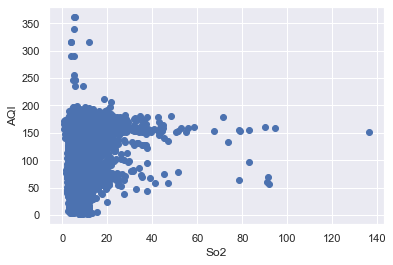

In [9]:
plt.scatter(x['so2'],y)
plt.xlabel('So2')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

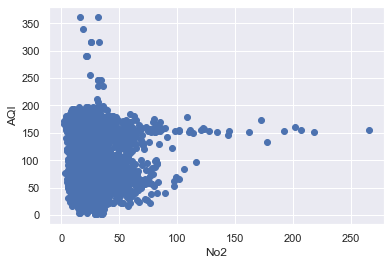

In [10]:
plt.scatter(x['no2'],y)
plt.xlabel('No2')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

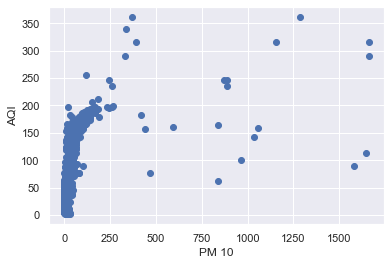

In [11]:
plt.scatter(x['PM10'],y)
plt.xlabel('PM 10')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

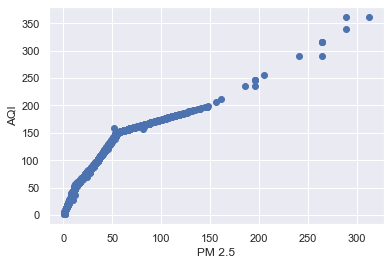

In [12]:
plt.scatter(x['PM25'],y)
plt.xlabel('PM 2.5')
plt.ylabel('AQI')

#### 5.Standardizing the features

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
df = scaler.transform(x)
df = pd.DataFrame(df,columns = Df.columns)
x = df.iloc[:,:]
x.values

array([[ 0.21390466,  0.92949046,  0.57663776, ..., -0.79589057,
         0.91842747,  2.36383617],
       [ 0.32328842,  0.92949046,  0.59839614, ..., -1.56482906,
         1.51172814,  3.02354567],
       [ 0.41543181,  0.71216205, -0.9537013 , ...,  0.02480339,
         1.05403905,  2.81034687],
       ...,
       [-0.87161026,  0.54916575,  0.12454708, ..., -0.97333792,
         0.29122391,  0.81915049],
       [-0.91976289,  0.65782995, -0.27677407, ..., -0.95855064,
         0.25732102,  0.78294692],
       [-0.95840389,  0.76649416,  0.16806383, ..., -0.97333792,
         0.18951523,  0.71053978]])

### Splitting the dataset into training and testing 

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 2)

### Algorithms

#### 1.Multiple Linear Regression

In [15]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [16]:
linear_reg_pred = linear_reg.predict(x_test)
linear_reg_pred

array([ 78.50758987, 114.72589108,  50.46659669, ...,  57.41083472,
        73.25508042, 118.92940253])

#### accuracy and overfitting or underfitting

In [17]:
print("Accuracy Score on training data: ",linear_reg.score(x_train,y_train))
print("Accuracy Score on testing data: ",linear_reg.score(x_test,y_test))

Accuracy Score on training data:  0.9091700278614888
Accuracy Score on testing data:  0.9004564246820818


In [18]:
print(f"Mean squared error: {mean_squared_error(y_test,linear_reg_pred)}\nMean absolute error: {mean_absolute_error(y_test,linear_reg_pred)}\nr2 score: {r2_score(y_test,linear_reg_pred)}")

Mean squared error: 180.94626313261497
Mean absolute error: 8.076691051444552
r2 score: 0.9004564246820818


In [19]:
#creating summary table
linear_reg_summary = pd.DataFrame(data = x.columns.values,columns = ['Features'])
linear_reg_summary['Cofficient'] = linear_reg.coef_

#### Checking for the p-value(should be: p<0.05)

In [20]:
from sklearn.feature_selection import f_regression
p_value = f_regression(x,y)[1]
p_value

array([3.97697741e-047, 9.86812087e-035, 7.32563693e-003, 3.25313967e-029,
       9.72623428e-001, 2.56827964e-102, 3.40067211e-002, 0.00000000e+000,
       0.00000000e+000])

In [21]:
linear_reg_summary['p-value'] = p_value.round(3)
linear_reg_summary

,Features,Cofficient,p-value
0,Temperature,1.937906,0.000
1,Humidity,0.147695,0.000
2,Wind.Speed..km.h.,-0.629838,0.007
3,Visibility,0.578356,0.000
4,Pressure,-0.482726,0.973
5,so2,1.144300,0.000
6,no2,0.224959,0.034
7,PM10,-3.144861,0.000
8,PM25,41.898905,0.000


#### Prediction

In [22]:
linear_prediction = x_test.copy()
linear_prediction["Predicted_AQI"] = linear_reg_pred
linear_prediction["Original_AQI"] = y_test
linear_prediction


,Temperature,Humidity,Wind.Speed..km.h.,Visibility,Pressure,so2,no2,PM10,PM25,Predicted_AQI,Original_AQI
6213,0.017727,1.309815,0.554879,1.558790,0.133046,-0.123471,0.039591,-0.234271,-0.178459,78.507590,80
7168,-0.932841,0.820826,1.734667,0.086796,0.207987,-0.485819,-0.049133,0.596350,0.843286,114.725891,140
2699,-0.467960,1.092487,1.935327,0.106796,0.108243,-0.281014,0.010016,-0.319028,-0.785874,50.466597,45
3533,-1.285366,0.820826,-1.466232,-1.693196,0.166140,-0.627608,-0.574081,-0.268174,-0.524404,60.183245,62
1560,0.417216,0.331837,0.571803,-1.905195,0.233653,0.475193,0.283581,-0.081708,-0.190527,76.829196,79
...,...,...,...,...,...,...,...,...,...,...,...
3655,-0.853181,0.875158,-1.543595,0.062797,0.168859,-0.627608,-1.416956,-0.183417,-0.258911,72.759504,76
1563,1.142478,-0.754805,0.068942,-2.293193,0.237433,0.475193,0.209644,0.545496,0.795015,117.468703,137
3374,-1.171227,0.820826,-0.327544,0.062797,0.236505,-0.879677,0.024803,-0.352931,-0.604857,57.410835,58
3746,-1.957125,-0.048487,0.213998,1.342791,0.147968,-0.312522,0.357517,-0.132562,-0.198572,73.255080,79


#### 2.K-Nearest Neighbours

In [23]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
knn_pred = knn_reg.predict(x_test)
knn_pred

array([ 79.        , 138.66666667,  53.        , ...,  57.66666667,
        65.        , 154.66666667])

#### Error and accuracy

In [25]:
print("Accuracy Score on training data: ",knn_reg.score(x_train,y_train))
print("Accuracy Score on testing data: ",knn_reg.score(x_test,y_test))
print(f"Mean squared error: {mean_squared_error(y_test,knn_pred)}\nMean absolute error: {mean_absolute_error(y_test,knn_pred)}\nr2 score: {r2_score(y_test,knn_pred)}")

Accuracy Score on training data:  0.9741357725358166
Accuracy Score on testing data:  0.9455509700292093
Mean squared error: 98.97523243408016
Mean absolute error: 7.0038866026520346
r2 score: 0.9455509700292093


#### Prediction

In [26]:
knn_prediction = x_test.copy()
knn_prediction["Predicted_AQI"] = knn_pred
knn_prediction["Original_AQI"] = y_test
knn_prediction

,Temperature,Humidity,Wind.Speed..km.h.,Visibility,Pressure,so2,no2,PM10,PM25,Predicted_AQI,Original_AQI
6213,0.017727,1.309815,0.554879,1.558790,0.133046,-0.123471,0.039591,-0.234271,-0.178459,79.000000,80
7168,-0.932841,0.820826,1.734667,0.086796,0.207987,-0.485819,-0.049133,0.596350,0.843286,138.666667,140
2699,-0.467960,1.092487,1.935327,0.106796,0.108243,-0.281014,0.010016,-0.319028,-0.785874,53.000000,45
3533,-1.285366,0.820826,-1.466232,-1.693196,0.166140,-0.627608,-0.574081,-0.268174,-0.524404,60.666667,62
1560,0.417216,0.331837,0.571803,-1.905195,0.233653,0.475193,0.283581,-0.081708,-0.190527,77.000000,79
...,...,...,...,...,...,...,...,...,...,...,...
3655,-0.853181,0.875158,-1.543595,0.062797,0.168859,-0.627608,-1.416956,-0.183417,-0.258911,74.666667,76
1563,1.142478,-0.754805,0.068942,-2.293193,0.237433,0.475193,0.209644,0.545496,0.795015,131.333333,137
3374,-1.171227,0.820826,-0.327544,0.062797,0.236505,-0.879677,0.024803,-0.352931,-0.604857,57.666667,58
3746,-1.957125,-0.048487,0.213998,1.342791,0.147968,-0.312522,0.357517,-0.132562,-0.198572,65.000000,79


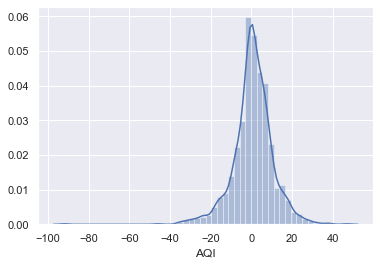

In [27]:
sns.distplot(y_test-knn_pred)

#### 3.Decision Tree 

In [28]:
decision_reg = tree.DecisionTreeRegressor(random_state=3)
decision_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=3)

In [29]:
decision_pred = decision_reg.predict(x_test)
decision_prediction = x_test.copy()

#### Error and accuracy

In [30]:
print("Accuracy Score on training data: ",decision_reg.score(x_train,y_train))
print("Accuracy Score on testing data: ",decision_reg.score(x_test,y_test))
print(f"Mean squared error: {mean_squared_error(y_test,decision_pred)}\nMean absolute error: {mean_absolute_error(y_test,decision_pred)}\nr2 score: {r2_score(y_test,decision_pred)}")

Accuracy Score on training data:  1.0
Accuracy Score on testing data:  0.9986725996498679
Mean squared error: 2.4128943758573387
Mean absolute error: 0.2139917695473251
r2 score: 0.9986725996498679


#### Prediction

In [31]:
decision_prediction["Predicted_AQI"] = decision_pred
decision_prediction["Original_AQI"] = y_test
decision_prediction

,Temperature,Humidity,Wind.Speed..km.h.,Visibility,Pressure,so2,no2,PM10,PM25,Predicted_AQI,Original_AQI
6213,0.017727,1.309815,0.554879,1.558790,0.133046,-0.123471,0.039591,-0.234271,-0.178459,80.0,80
7168,-0.932841,0.820826,1.734667,0.086796,0.207987,-0.485819,-0.049133,0.596350,0.843286,140.0,140
2699,-0.467960,1.092487,1.935327,0.106796,0.108243,-0.281014,0.010016,-0.319028,-0.785874,45.0,45
3533,-1.285366,0.820826,-1.466232,-1.693196,0.166140,-0.627608,-0.574081,-0.268174,-0.524404,62.0,62
1560,0.417216,0.331837,0.571803,-1.905195,0.233653,0.475193,0.283581,-0.081708,-0.190527,79.0,79
...,...,...,...,...,...,...,...,...,...,...,...
3655,-0.853181,0.875158,-1.543595,0.062797,0.168859,-0.627608,-1.416956,-0.183417,-0.258911,76.0,76
1563,1.142478,-0.754805,0.068942,-2.293193,0.237433,0.475193,0.209644,0.545496,0.795015,138.0,137
3374,-1.171227,0.820826,-0.327544,0.062797,0.236505,-0.879677,0.024803,-0.352931,-0.604857,58.0,58
3746,-1.957125,-0.048487,0.213998,1.342791,0.147968,-0.312522,0.357517,-0.132562,-0.198572,79.0,79


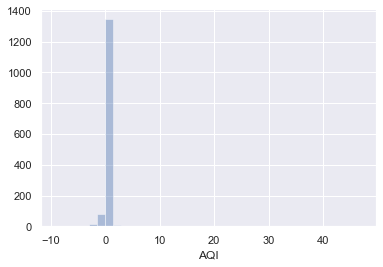

In [32]:
sns.distplot(y_test-decision_pred,kde = False)

#### 4.Support Vector Machine

In [33]:
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_train,y_train)

SVR()

In [34]:
svr_pred = svr_reg.predict(x_test)
svr_prediction = x_test.copy()

#### Error and Accuracy

In [35]:
print("Accuracy Score on training data: ",svr_reg.score(x_train,y_train))
print("Accuracy Score on testing data: ",svr_reg.score(x_test,y_test))
print(f"Mean squared error: {mean_squared_error(y_test,svr_pred)}\nMean absolute error: {mean_absolute_error(y_test,svr_pred)}\nr2 score: {r2_score(y_test,svr_pred)}")

Accuracy Score on training data:  0.8952576917949333
Accuracy Score on testing data:  0.8776641070784983
Mean squared error: 222.3772111905733
Mean absolute error: 6.263963694016249
r2 score: 0.8776641070784983


#### Prediction

In [36]:
svr_prediction["Predicted_AQI"] = svr_pred
svr_prediction["Original_AQI"] = y_test
svr_prediction

,Temperature,Humidity,Wind.Speed..km.h.,Visibility,Pressure,so2,no2,PM10,PM25,Predicted_AQI,Original_AQI
6213,0.017727,1.309815,0.554879,1.558790,0.133046,-0.123471,0.039591,-0.234271,-0.178459,79.377747,80
7168,-0.932841,0.820826,1.734667,0.086796,0.207987,-0.485819,-0.049133,0.596350,0.843286,134.363393,140
2699,-0.467960,1.092487,1.935327,0.106796,0.108243,-0.281014,0.010016,-0.319028,-0.785874,48.306937,45
3533,-1.285366,0.820826,-1.466232,-1.693196,0.166140,-0.627608,-0.574081,-0.268174,-0.524404,63.416492,62
1560,0.417216,0.331837,0.571803,-1.905195,0.233653,0.475193,0.283581,-0.081708,-0.190527,79.244043,79
...,...,...,...,...,...,...,...,...,...,...,...
3655,-0.853181,0.875158,-1.543595,0.062797,0.168859,-0.627608,-1.416956,-0.183417,-0.258911,75.575801,76
1563,1.142478,-0.754805,0.068942,-2.293193,0.237433,0.475193,0.209644,0.545496,0.795015,127.124666,137
3374,-1.171227,0.820826,-0.327544,0.062797,0.236505,-0.879677,0.024803,-0.352931,-0.604857,56.220155,58
3746,-1.957125,-0.048487,0.213998,1.342791,0.147968,-0.312522,0.357517,-0.132562,-0.198572,78.095171,79


### Accuracy Comparison

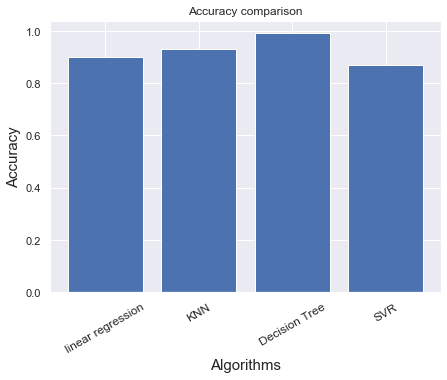

In [37]:
accuracies_label = ['linear regression','KNN',"Decision Tree","SVR"]
accuracies = [0.90,0.93,0.99,0.87]
index = np.arange(len(accuracies_label))
plt.figure(figsize = (7,5))
plt.bar(index,accuracies)
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, accuracies_label, fontsize=12, rotation=30)
plt.title('Accuracy comparison')
plt.show()

### Error Comparison

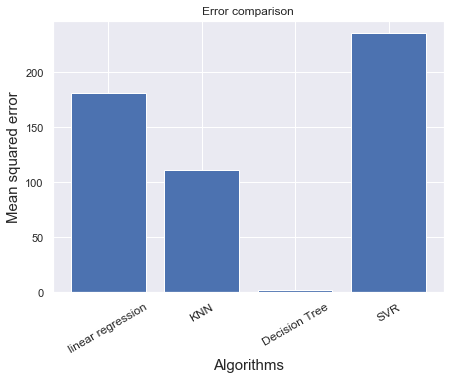

In [38]:
accuracies_label = ['linear regression','KNN',"Decision Tree","SVR"]
error = [181.715,110.810,2.037,235.402]
index = np.arange(len(accuracies_label))
plt.figure(figsize = (7,5))
plt.bar(index,error)
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Mean squared error', fontsize=15)
plt.xticks(index, accuracies_label, fontsize=12, rotation=30)
plt.title('Error comparison')
plt.show()

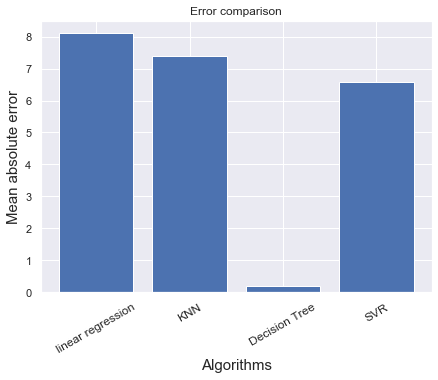

In [39]:
accuracies_label = ['linear regression','KNN',"Decision Tree","SVR"]
error = [8.098,7.399,0.196,6.585]
index = np.arange(len(accuracies_label))
plt.figure(figsize = (7,5))
plt.bar(index,error)
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Mean absolute error', fontsize=15)
plt.xticks(index, accuracies_label, fontsize=12, rotation=30)
plt.title('Error comparison')
plt.show()

In [93]:
import pickle
knn_classifier = open('knn_classifier.pkl','wb')
pickle.dump(knn_reg,knn_classifier)
knn_classifier.close()

In [88]:
import requests
from geopy.geocoders import Nominatim
api_key = '4b4a8d27e05baec16f1635dcce75a385'
address='Noida'
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
url1 = f'https://api.openweathermap.org/data/2.5/onecall?lat={location.latitude}&lon={location.longitude}&exclude=daily,minutely,hourly,alerts&appid={api_key}'
url = f'http://api.openweathermap.org/data/2.5/air_pollution?lat={location.latitude}&lon={location.longitude}&appid={api_key}'
response1 = requests.get(url1)
response2 = requests.get(url)
r1 = response1.json()
r2 = response2.json()

In [89]:
x1 = [[r1['current']['temp'],r1['current']['humidity'],r1['current']['wind_speed'],r1['current']['pressure'],r1['current']['visibility'],r2['list'][0]['components']['so2'],r2['list'][0]['components']['no2'],r2['list'][0]['components']['pm10'],r2['list'][0]['components']['pm2_5']]]

In [90]:
x1

[[308.15, 24, 3.6, 1004, 4000, 82.97, 51.41, 167.24, 123.8]]

In [91]:
print(r1)
print(r2)

{'lat': 28.5708, 'lon': 77.3271, 'timezone': 'Asia/Kolkata', 'timezone_offset': 19800, 'current': {'dt': 1620223738, 'sunrise': 1620173209, 'sunset': 1620221273, 'temp': 308.15, 'feels_like': 306.74, 'pressure': 1004, 'humidity': 24, 'dew_point': 284.58, 'uvi': 0, 'clouds': 40, 'visibility': 4000, 'wind_speed': 3.6, 'wind_deg': 60, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}]}}
{'coord': {'lon': 77.3271, 'lat': 28.5708}, 'list': [{'main': {'aqi': 5}, 'components': {'co': 1495.36, 'no': 0, 'no2': 51.41, 'o3': 143.05, 'so2': 82.97, 'pm2_5': 123.8, 'pm10': 167.24, 'nh3': 25.59}, 'dt': 1620223200}]}


In [92]:
result = knn_reg.predict(x1)
result2 = decision_reg.predict(x1)
print(int(result))
print(int(result2))

216
291


In [83]:
linear_reg.predict(x1)

array([5046.32498005])

In [84]:
svr_reg.predict(x1)

array([95.83404398])

In [87]:
abs(result-x1[0][-2])

array([73.34666667])